<a href="https://colab.research.google.com/github/javicivit/Curso_DL_ICE/blob/master/ICE_dl_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About this tutorial 

You would like to try deep learning but don't have a GPU? Or you don't want to install software on your computer? 

This tutorial is for you, as it requires **no specific hardware or software**. 

Instead, we'll use the **Colaboratory platform from Google**.

In this tutorial, you will learn: 

* What is the google colaboratory platform and how to use it. 
* What is a **convolutional network**, and what are its most important layers: the **convolutional layers**, **the maxpooling layers**, and **the dropout layers**;
* How to build a simple convolutional network, and **how to tune it to reach an accuracy around 99.4% in the recognition of handwritten digits**.

You can start following this tutorial right away. But if you want to get an introduction to the tools we will use, you can: 

* have a look at [my first tutorial on handwritten digits](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/). This will show you which kind of performance we can get without deep learning, and will teach you the basics of numpy, matplotlib, and neural networks. 
* follow this [short tutorial on Keras](https://thedatafrog.com/first-neural-network-keras/).

As always, if you encounter any issue or have questions, don't hesitate to comment at the bottom of this page and I'll help you. 


## The Google Colaboratory Platorm

Google has recently set up the [Colaboratory Platform](https://colab.research.google.com/notebooks/welcome.ipynb) to promote the use of TensorFlow for deep learning, and it's awesome! 

It provides: 

* python environments with all the necessary software, and you can install more if needed
* access to GPUs
* excellent tutorials
* the possibility to run your own code (and my stuff!)

In particular, the author of Keras and google engineer François Chollet set up extremely useful tutorials in which Keras is used as an interface to TensorFlow. For example, you can check out [this one](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb) where we learn how to classify clothing items (trousers, shoes, and whatnot). 

I do encourage you to dig into the google colab tutorials on your own! I would only advise you to stick to the keras-based tutorials which are much easier. 

On my side, I intend to use this tool to provide you with original content, as well as more details about the subjects already covered by google. 

💡 **To run your jupyter notebook on google colab, you can either:**

* **commit it to github, and to provide a specific url to direct google colab to the notebook.**
* **put it in your google drive, and use Chrome to open it with Colab.**

The url of this tutorial on github is https://github.com/cbernet/maldives/blob/master/hwd_deeplearning_google/hwd_dl_google.ipynb

The url to run it on google colab is https://colab.research.google.com/github/cbernet/maldives/blob/master/hwd_deeplearning_google/hwd_dl_google.ipynb

Just follow this link now. Then:

* head to the Runtime (or Exécution) menu, and change the runtime to GPU
* click "CONNECT" on the top right.
* execute the cells one by one by selecting them and pressing shift+enter

## The Dataset

In [my first tutorial on handwritten digits](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/), we have used the simplified digits dataset provided with scikit-learn because we didn't have the resources to process the [real MNIST handrwitten digits dataset](http://yann.lecun.com/exdb/mnist/) at that time. 

Here, we have access to the GPUs from Google, and to keras which provides an easy way to load this dataset:

In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Let's have a look our dataset.

In [3]:
print( x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


so: 

* 60,000 training samples and 10,000 test samples
* images are 28x28 = 784 pixels, while they are 8x8=64 pixels in the simplified digits dataset of scikit-learn. We have images with much better resolution, but need networks with many more neurons to process them

Now let's plot some of these images. 

In [4]:
import matplotlib.pyplot as plt
def plot_img(i):
    # plot the image and the target for sample i
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')

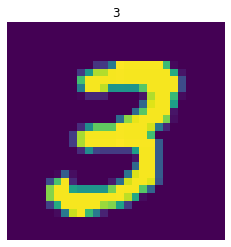

In [6]:
plot_img(7)

Please have a look at other images by repeating the plot above for different samples

Now we should check the actual data for a given image. Let's put the values in the pixels of the first image in an histogram: 

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

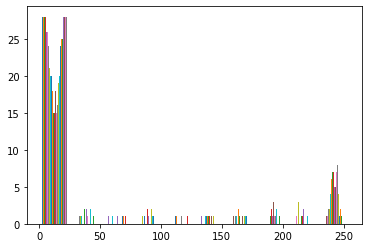

In [7]:
plt.hist(x_train[0])

We see that the values in the image array are between 0 and 255 (the values are coded on 8 bits). 

This is not adequate. Indeed, for a neural network to work well, it must deal with input values close to unity. So we're going to normalize all images to values between 0 and 1: 

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

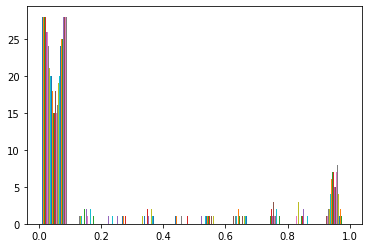

In [5]:
import numpy as np
x_train = x_train/255.
plt.hist(x_train[0])

💡 **Always normalize your input data.**

And we must do the same for the test dataset:

In [6]:
x_test = x_test/255.

We should also check our targets: 

In [9]:
y_train[0]

5

For the reasons explained in [our first keras tutorial](https://thedatafrog.com/first-neural-network-keras/), we're going to perform one-hot encoding on the targets: 

In [7]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train[0]) 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Convolutional Neural Networks

Classifying handwritten digits in 10 categories is a task of image recognition. 

Since convolutional neural networks are known to provide excellent performance for image recognition, we're going to use them. 

A convolutional neural network for image classification typically features the following layers: 

* the first layers are **convolutional layers**, interleaved with **pooling layers**. The role of these layers is to extract interesting features from the image.
* then come  **dense layers**, which interpret the features from the first stage, and provide the probability for the image to belong to each category. 

In addition to these, **dropout** layers can be added to regularize the network or in other words, to make it more stable. 

Before building the network, I'd like to explain each kind of layer in details. 

### Convolutional layers

A 2D [convolutional layer](https://keras.io/layers/convolutional/) scans the input image from left to right and from top to bottom, with a small window, called the **kernel**. In the example below, we use a window of 5x5 pixel. After every step, the image moves right. Here, we use a **stride** of 1 pixel, meaning that we move the window by 1 pixel. When the right border of the window hits the right border of the image, the window is returned to the left and moved down by 1 pixel. 

![](https://github.com/cbernet/maldives/blob/master/hwd_deeplearning_google/conv_layer.png?raw=1)

At each step, the pixels within the window are considered and a number of features are extracted. Each feature is just a value. Let's say there are **nf** features to be extracted for each position of the window (nf could be of the order of 10). 

At first these features are completely meaningless, but the network is going to be trained to extract meaningful features. For example, if you do face recognition, the features might be related to the presence of an eye or a nose. For now, just keep in mind that a fixed number of values are extracted for each window, and that these values are going to make sense to the network (and maybe not to us!).

Now, what kind of data do we get out of the convolutional layer? 
Let **(nx, ny)** be the shape of the picture, so nx and ny are the numbers of pixels in the image along the horizontal and vertical directions, respectively. 

For each window position, we get 10 features, and the window positions are arranged in a 2D array. So the output of the convolutional layer is a 3D array (ox, oy, nf), where **ox** and **oy** are the numbers of output pixels along the horizontal and vertical directions, and nf is the number of features for each pixel.

The user (we) decide on the number of features to be extracted, so we know that. But what about ox and oy? 

The answer is simple. For example, the number of output pixels along the horizontal direction is **ox = nx - kernel_size + 1**. 

To convince yourself, you can use the simple case below, with an image of size 7x5 and a window of size 3x3.  

![](https://raw.githubusercontent.com/cbernet/maldives/master/hwd_deeplearning_google/conv_layer_simple.png)

Ok... I have spent three hours in blender trying to model a convolutional layer in 3D as an illustration, and barely managed to model a cube. So I gave up on this software and, as a last resort, went back to my favorite 3D modelling hardware: 

![](https://raw.githubusercontent.com/cbernet/maldives/master/hwd_deeplearning_google/crayon.png)


And here's the result, with shading and transparency! 

![](https://raw.githubusercontent.com/cbernet/maldives/master/hwd_deeplearning_google/conv_layer_schema.png)

### Pooling layers

Pooling layers are used to reduce the size of the data at a given stage to reduce the complexity of the network. In this case we will use 2D pooling layers, and in particular, the [MaxPooling2D](https://keras.io/layers/pooling/). 

The keras documentation is a bit scarce, so let's see how it works on a simple image. Here we use [seaborn](https://seaborn.pydata.org/), a high-level interface to matplotlib, to get a heat map with annotations.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


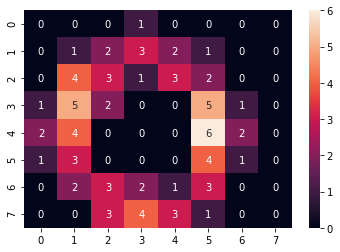

In [12]:
import numpy as np
import seaborn as sns

# building the image of a zero:
zero = np.array([[0,0,0,1,0,0,0,0],
                 [0,1,2,3,2,1,0,0],
                 [0,4,3,1,3,2,0,0],
                 [1,5,2,0,0,5,1,0],
                 [2,4,0,0,0,6,2,0],
                 [1,3,0,0,0,4,1,0],
                 [0,2,3,2,1,3,0,0],
                 [0,0,3,4,3,1,0,0]])
sns.heatmap(zero, annot=True)

Pooling layers are based on a pooling window that moves across the image like the kernel of the convolutional layers. For every position of the pooling window, a number is extracted, for example: 

* the maximum value in the window (max pooling)
* the average value over the window (average pooling)

We're going to use [scikit-image](http://scikit-image.org/docs/dev/auto_examples/numpy_operations/plot_view_as_blocks.html) to perform each pooling operation. By the way I didn't know scikit-image, I just googled "max pooling numpy". Google is your friend, especially when you're trying to do something in python

In [24]:
from skimage.util import view_as_blocks
pooling_window_shape = (2,2)
view = view_as_blocks(zero, pooling_window_shape)
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)
max_view = np.max(flatten_view, axis=2)

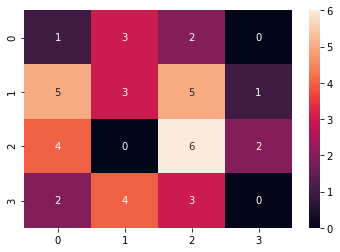

In [25]:
sns.heatmap(max_view, annot=True)

Please check that the pooled values are what you expect for both the max pooling and the average pooling operations. 

Coming back to our case, we will want to pool after a convolutional layer. The input to the pooling is a 3D array with several values (the features) for each pixel. 

In this case, the pooling layer will pool each feature separately for each position of the pooling window. 

So the pooling will reduce the dimensionality along the x and y directions, but the number of features in output will stay the same. That's good, because maxing or averaging over all features would not make any sense. 

### Dense layers

A sub-network of dense layers is added at the end of the deep neural network. The aim of this sub-network is to make use of the features extracted by the previous layers to perform the classification.

We know about dense layers already since the tutorial about [handwritten digits with scikit-learn](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/), so I'm not going to give details here. 

Two things to note: 

**1- Dense layers are fully connected to the previous layer.** This means that each neuron in the dense layer has a connection to all neurons in the previous layer. 

**2- The input to a dense layer is 1D.** But the output of our convolutional (or pooling) layers is 3D... So we will need to flatten the 3D data to 1D, by just serializing all numbers. To do that in keras, we will insert a [Flatten layer](https://keras.io/layers/core/) just before the dense layer. 

The last layer of our dense sub-network will have a **softmax activation**. This means that the output of neuron $k$ is set to 

$$y_k = \frac{e^{z_k}}{\sum_{i=1}^{N} e^{z_i}}$$,

where the sum runs over the N neurons of the layer. 

Please note that the softmax activation is well suited to classification problems: 

* the probability for a given class is bound between 0 and 1. 
* all probabilities sum up to 1

### Dropout layers 

Deep convolutional neural networks are complicated and have a lot of tunable parameters. And for this reason, they can easily go wrong.

During the training, the network can **overfit** the training data. This means that it gets very good at recognizing specific examples of the training data, but looses its ability to recognize new, unseen examples, and loses generality. This is typically due to parts of the network that evolve in a coordinated way and in the wrong direction during training. 

**Dropout regularization** is a way to reduce this effect  

To perform dropout normalization, we will insert an additional layer just before the dense sub-network, containing one neuron per output variable in the previous layer. Each neuron acts as a gate, and is turned on and off randomly during the training. When it's on, the corresponding variable flows to the following dense layer. When it's off, the variable is blocked, and the neuron outputs zero. 

In this way, some part of the network, which is always changing, is deactivated, and only the rest is trained.

After training, for the evaluation of the unseen test samples, the dropout layer is removed, and the whole network is used. 

To learn more about dropout regularization, you can refer to the [original paper](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf).



## Building the network 

Let's first build a simple convolutional neural network with keras.  

In [8]:
from keras import models
from keras import layers

We start with the convolutional layer, specifying that: 

* we want to extract 10 features for each kernel
* the kernel size is 4x4
* the input images are 28x28 pixels
* we use a ReLU activation. We could have used a sigmoid, but the ReLU is way better for deep neural networks. If you want to know more, here is a [nice post about ReLUs](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning)

In [2]:
model = models.Sequential()
model.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )

At this stage, here is a summary of our network:

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 10)        170       
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In the output shape, we should ignore the first `None`. Then come the shape of the output array. The x and y dimensions are of size 28 - 4 + 1 = 25, and the last dimension corresponds to the number of features we have required. So far so good. 

Now, we add the dense neural network, forgetting about dropout for now. As a starting point, let's try a simple dense subnetwork with a single hidden layer of 100 neurons. Before the dense sub-network, the 3D array is flattened.

In [ ]:
model.add( layers.Flatten() )
model.add( layers.Dense(100, activation='relu') )

And finally, our final softmax layer with 10 neurons, for the 10 digit categories:

In [ ]:
model.add( layers.Dense(10, activation='softmax') )

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
flatten_1 (Flatten)          (None, 6250)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               625100    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 626,280
Trainable params: 626,280
Non-trainable params: 0
_________________________________________________________________


We have more than 600k parameters to optimize! let's compile the model, and then train it.

In [9]:
from keras.optimizers import RMSprop

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [12]:
kx_train = x_train.reshape(len(x_train),28,28,1)
kx_test = x_test.reshape(len(x_test),28,28,1)

In [ ]:
kx_test.shape

(10000, 28, 28, 1)

In [ ]:
history = model.fit(kx_train, y_train, validation_data=(kx_test,y_test),
                    batch_size=50, epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.1713 - acc: 0.9483 - val_loss: 0.0746 - val_acc: 0.9760
Epoch 2/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0581 - acc: 0.9823 - val_loss: 0.0515 - val_acc: 0.9817
Epoch 3/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0382 - acc: 0.9886 - val_loss: 0.0475 - val_acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0272 - acc: 0.9920 - val_loss: 0.0440 - val_acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0197 - acc: 0.9942 - val_loss: 0.0520 - val_acc: 0.9843
Epoch 6/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0145 - acc: 0.9959 - val_loss: 0.0757 - val_acc: 0.9816
Epoch 7/10
60000/60000 [==============================] - 8s 129us/step - 

We're getting an accuracy larger than 98% from this first try. Much better than the mere 91% we got from the simple dense neural net we set up with scikit-learn. Deep learning starts to show its power!

And it's not the end of the story. Let's try and do even better. 

## Tuning the network 

### Dealing with overfitting

A neural network has *parameters* (weights and biases) that are tuned during the training. The **hyperparameters** are the parameters affecting the network configuration, such as the number of layers, the number of neurons per layer, the number of features extracted by the convolutional layers, etc. 

We can try and improve the performance by tuning the hyperparameters. 

But how should we start? 

First of all: 

💡**VERY IMPORTANT: Start with a very simple network, and tune it by making it more complex.**

If you start from a complex network, you'll have many more hyperparameters to play with, and it's easy to get lost. 

Then, we should not tune blindly, so let's start by having a more detailed look at the performance. First of all, we can plot the evolution of the accuracy as a function of the training evolution. The accuracy is computed for both the training and the test samples. 


In [15]:
def plot_accuracy(history, miny=None):
  acc = history.history['acc']
  test_acc = history.history['val_acc']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy') 
  plt.figure()


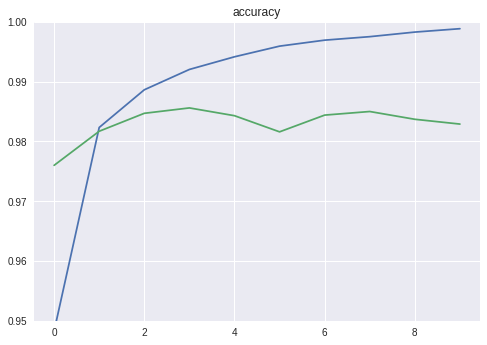

<Figure size 576x396 with 0 Axes>

In [ ]:
plot_accuracy(history, miny=0.95)

We see that the accuracy on the training sample continuously improves: the network gets better and better at recognizing the digits of this sample, because it's trained to do so. 

But the accuracy on the testing sample, which is not used for training, plateaus very early at about 98.5%. Training further will not help. 

That's a clear sign of overfitting. And the more complex the network, the easier it is for it to learn the specific examples  of the training sample. 

**So our first step should not be to make the network more complex, but to solve this overfitting problem. **

To do that, we'll create a new instance of our network, in which we will introduce a dropout layer, just before the dense sub-network:

In [ ]:
model_do = models.Sequential()
model_do.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )
model_do.add( layers.Flatten() )
model_do.add( layers.Dropout(rate=0.5) )
model_do.add( layers.Dense(100, activation='relu') )
model_do.add( layers.Dense(10, activation='softmax') )
model_do.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
flatten_2 (Flatten)          (None, 6250)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6250)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               625100    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 626,280
Trainable params: 626,280
Non-trainable params: 0
_________________________________________________________________


The dropout layer has the same output shape as the flatten layer just before. It will drop 50% of the values from flatten, chosen on a random basis.

Let's compile, fit, and then check the performance.


In [ ]:
model_do.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

history_do = model_do.fit(kx_train, y_train, validation_data=(kx_test,y_test),
                    batch_size=50, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.1954 - acc: 0.9410 - val_loss: 0.0674 - val_acc: 0.9788
Epoch 2/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0811 - acc: 0.9750 - val_loss: 0.0569 - val_acc: 0.9802
Epoch 3/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0634 - acc: 0.9811 - val_loss: 0.0498 - val_acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0545 - acc: 0.9833 - val_loss: 0.0442 - val_acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0496 - acc: 0.9850 - val_loss: 0.0458 - val_acc: 0.9851
Epoch 6/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0454 - acc: 0.9861 - val_loss: 0.0417 - val_acc: 0.9860
Epoch 7/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0419 - acc: 0.9875 - val_loss: 0.0429 - 

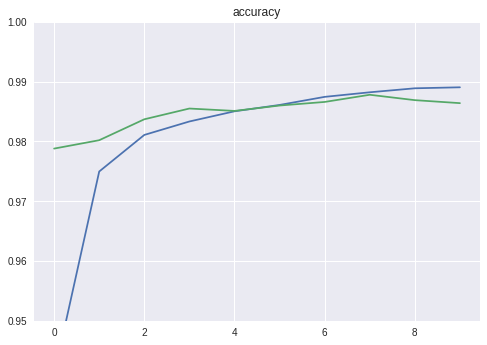

<Figure size 576x396 with 0 Axes>

In [ ]:
plot_accuracy(history_do, miny=0.95)

The situation is improved, but the network would still be able to overtrain, given enough time (more epochs). And we might be seeing a hint for overfitting starting at epoch 8. Anyway, let's stick with this setting for now,  and let's try to make our network more complex. 

One thing we can do is to play with the hyperparameters of the dense subnetwork. Let's try to add neurons to the hidden layer.

### Tuning the dense sub-network

In [ ]:
model_do_200 = models.Sequential()
model_do_200.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )
model_do_200.add( layers.Flatten() )
model_do_200.add( layers.Dropout(rate=0.5) )
model_do_200.add( layers.Dense(200, activation='relu') )
model_do_200.add( layers.Dense(10, activation='softmax') )
model_do_200.summary()

model_do_200.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

history_do_200 = model_do_200.fit(kx_train, y_train, validation_data=(kx_test,y_test),
                    batch_size=50, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
flatten_3 (Flatten)          (None, 6250)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6250)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               1250200   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
Total params: 1,252,380
Trainable params: 1,252,380
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 163us/step - loss: 0

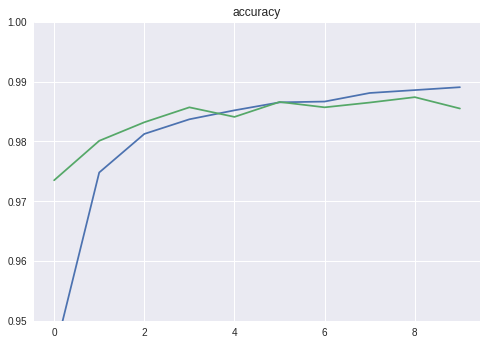

<Figure size 576x396 with 0 Axes>

In [ ]:
plot_accuracy(history_do_200, miny=0.95)

The validation accuracy, computed on the training sample, did not improve. 

But this is already teaching us something: 200 neurons on the hidden dense layer is not better than 100. Now, we started with 100... maybe it was too much.  Could 50 neurons do the job? 

In [ ]:
model_do_50 = models.Sequential()
model_do_50.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )
model_do_50.add( layers.Flatten() )
model_do_50.add( layers.Dropout(rate=0.5) )
model_do_50.add( layers.Dense(50, activation='relu') )
model_do_50.add( layers.Dense(10, activation='softmax') )
model_do_50.summary()

model_do_50.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

history_do_50 = model_do_50.fit(kx_train, y_train, validation_data=(kx_test,y_test),
                    batch_size=50, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
flatten_4 (Flatten)          (None, 6250)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6250)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                312550    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 313,230
Trainable params: 313,230
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.2584

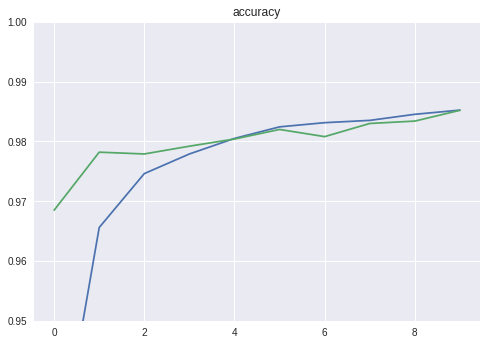

<Figure size 576x396 with 0 Axes>

In [ ]:
plot_accuracy(history_do_50, miny=0.95)

This time, the accuracy on the training sample plateau around 98.5%, because 50 neurons do not appear to be enough to capture all the information from the training samples. Let's go back to 100 neurons as our baseline. 

As an exercise, you could check what happens if you add a second hidden layer, with e.g. 50 neurons in both hidden layers. 

You will probably see that there is nothing to gain in playing this game. And if you manage to improve the performance in this way, please give details in the comments! 

Another way to improve performance is to act on the first stage of the network. Usually, image recognition is done with networks featuring stacked convolutional layers. Let's try that. 

### Stacked convolution layers

In the model below, we add a second convolutional layer after the first one. 
Before this second convolutional layer, we perform a max pooling in a window of 2x2 pixels and then apply the new convolutional layer on the output of the max pooling layer. In this way, the second convolutional layer will learn longer-distance features, and we reduce the number of parameters in the network for faster training and for less overfitting. We also increase the  number of features to be extracted from 10 to 20. 

In [ ]:
model_2c = models.Sequential()
model_2c.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )
model_2c.add( layers.MaxPooling2D(2) )
model_2c.add( layers.Conv2D(20, 4, activation='relu') )
model_2c.add( layers.Flatten() )
model_2c.add( layers.Dropout(rate=0.5) )
model_2c.add( layers.Dense(100, activation='relu') )
model_2c.add( layers.Dense(10, activation='softmax') )
model_2c.summary()

model_2c.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

history_2c = model_2c.fit(kx_train, y_train, validation_data=(kx_test,y_test),
                    batch_size=50, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 20)          3220      
_________________________________________________________________
flatten_5 (Flatten)          (None, 1620)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1620)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               162100    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total para

We achieved a test accuracy over 99%, which is great! but can we do even better? 

### To 100% and beyond!

After one hour of optimization, I converged to this network: 

In [13]:
model_best = models.Sequential()
model_best.add( layers.Conv2D(16, 4, input_shape=(28,28,1), activation='relu') )
model_best.add( layers.MaxPooling2D(2) )
model_best.add( layers.Conv2D(32, 4, activation='relu') )
model_best.add( layers.MaxPooling2D(2) )
model_best.add( layers.Flatten() )
model_best.add( layers.Dropout(0.4) )
model_best.add( layers.Dense(100, activation='relu') )
model_best.add( layers.Dense(10, activation='softmax') )
model_best.summary()
model_best.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

history_best = model_best.fit(kx_train, y_train, validation_data=(kx_test,y_test),
                              batch_size=200, epochs=40)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 16)        272       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 32)          8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

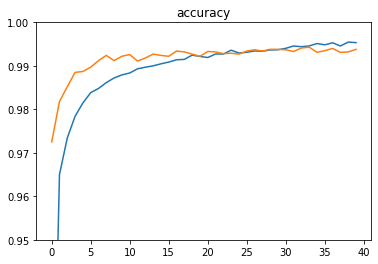

<Figure size 432x288 with 0 Axes>

In [16]:
plot_accuracy(history_best, miny=0.95)

The accuracy on the test sample now plateaus around 99.4%. 

In this attempt: 

* I extract more features from the two convolutional layers
* I added a second max pooling layer to reduce complexity before the dense network
* I lowered the dropout rate to 40%, and I checked that overfitting appears if I go lower
* I increased the batch size to train faster, and trained for 40 epochs. I checked that more epochs are not useful 

Can you do even better? If yes please tell us in the comments, I'd love to hear from it.

Obviously, we can't get an accuracy larger than 100%... And you really need to fight for 0.1% at the end! Moreover, when you're at this stage, you need to be careful about the performance metric. For instance:

* what is the precision on the accuracy?
* the accuracy varies as a function of the epoch. What are we supposed to do with that? 

I'll come back to these questions in a future post. 

For now, let's have a look at the digits we did not manage to classify. 

## Learning from the failures

First, we evaluate the predictions of the network for the whole testing sample, and we get the predicted and true digits for this sample by choosing the digit with maximum probability. 

In [17]:
preds = model_best.predict(kx_test)
pred_digits = np.argmax(preds, axis=1)
y_digits = np.argmax(y_test, axis=1)
print(pred_digits) 
print(y_digits) 

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


Then we extract the images, the true labels, and the predicted labels for the misclassified digits: 

In [18]:
mispred_img = x_test[pred_digits!=y_digits]
mispred_true = y_digits[pred_digits!=y_digits]
mispred_pred = pred_digits[pred_digits!=y_digits]
print('number of misclassified digits:', mispred_img.shape[0]) 

number of misclassified digits: 62


Finally, let's have a look: 

In [28]:
def plot_img_results(array, true, pred, i, n=1):
    # plot the image and the target for sample i
    ncols = 12
    nrows = n/ncols + 1
    fig = plt.figure( figsize=(ncols*1.5, nrows*1.5), dpi=90)
    for j in range(n):
      index = j+i
      plt.subplot(nrows,ncols, j+1)
      plt.imshow(array[index])
      plt.title('tr: {} pr: {}'.format(true[index], pred[index]))
      plt.axis('off')

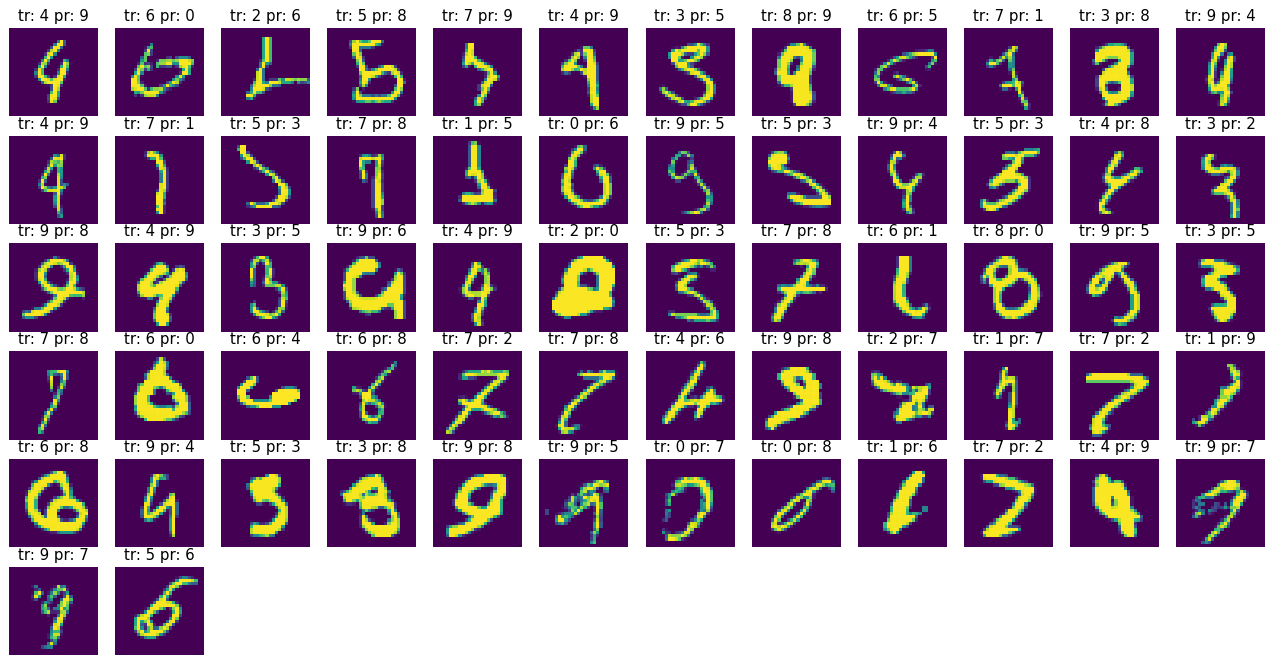

In [29]:
plot_img_results(mispred_img, mispred_true, mispred_pred, 0, len(mispred_img))

Ok, we're not doing so bad after all. To get better results, it would help to: 

* give people a pen that works (or get more old pens in the training set)
* teach them how to write properly (or get more bad writers in the training set)
* get rid of all these europeans who add an horizontal bar to the 7 (or get more europeans in the training set)

Still, for the major fraction of the misclassified digits, the human brain would perform better than our network, and we can always aim for better performance. 

The world record for this classification exercise is 99.8%. 

How well do you rank?

Do you have any idea on how to manipulate the input images to help the network on such bad cases? hint: it's always possible to edit the images before feeding them to the network for training, a technique called **data augmentation**. 

## Wrapping it up 

In this tutorial, you have learnt: 

* how to use the Google Colab platform to do deep learning, without having to install software or to buy a GPU; 
* how to use Google Colab to run your own notebooks;
* what is a convolutional network, and what are its most important layers: the convolutional layers, the maxpooling layers, and the dropout layers; 
* how to build a simple convolutional network, and how to tune it to reach an accuracy around 99.4% in the recognition of handwritten digits. 

Now, let's do a small contest! 

What's your highest accuracy? 

Please tell us in the comments. To claim your reward (a good dinner at my place if you're around!), you should: 

* post your accuracy history plot
* give the code that describes your model 

In the future, we'll try other image classification problems, and talk about data augmentation. 

We will also learn about other kinds of deep neural networks used in natural language processing and time series analysis.   
